# Used Car Price Prediction
#### Here , We Prect the price of a used car with attributes or features information about the old car.

In [81]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
df=pd.read_csv('used_cars_data.csv')

In [83]:
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [84]:
df.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,NaN,NaN


In [85]:

df.shape

(7253, 14)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


### Check for Duplication

#### nunique() used for finding number of unique values in each column , after analysing We can handle or remove the duplicate values

In [87]:
df.nunique()

S.No.                7253
Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               450
Engine                150
Power                 386
Seats                   9
New_Price             625
Price                1373
dtype: int64

### Finding Missing vlaues

In [88]:
df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

#### Bellow step is used to find the percentage of missing values in each column

In [89]:
(df.isnull().sum()/(len(df)))*100

S.No.                 0.000000
Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.027575
Engine                0.634220
Power                 0.634220
Seats                 0.730732
New_Price            86.129877
Price                17.013650
dtype: float64

#### Here We can see New_Price and Price has missing  86% and 17%.

## Data Reduction

##### Data reduction involves the remoing variables or columns from data set if it is no need for model building

##### here we removing the S.No. column there is no imapct this column to predict price of used car

In [90]:
df.drop(['S.No.'],axis=1,inplace=True)

In [91]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


### Feature Engineering 
##### Feature Engineering reffers to the process of selecting and tranform the variables from the data set befor model building . 

##### Here We can create new column car_Age , it is easy to analyse , we have the column Year now , we can get the values of car_Age from Year coloumn

In [92]:
from datetime import date
df['car_Age']=date.today().year-df['Year']

In [93]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,14
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,9
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,13
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,12
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,11


In [94]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,14
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,9
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,13
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,12
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,11


#### Here Name is not important variable for creating modeling but we can make new attributes from this column

In [95]:
df['Brand']=df.Name.str.split(' ').str.get(0)

In [96]:
df['Model']=df.Name.str.split(' ').str.get(1)+df.Name.str.split(' ').str.get(2)

In [97]:
df[['Name','Model','Brand']]

,Name,Model,Brand
0,Maruti Wagon R LXI CNG,WagonR,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Creta1.6,Hyundai
2,Honda Jazz V,JazzV,Honda
3,Maruti Ertiga VDI,ErtigaVDI,Maruti
4,Audi A4 New 2.0 TDI Multitronic,A4New,Audi
...,...,...,...
7248,Volkswagen Vento Diesel Trendline,VentoDiesel,Volkswagen
7249,Volkswagen Polo GT TSI,PoloGT,Volkswagen
7250,Nissan Micra Diesel XV,MicraDiesel,Nissan
7251,Volkswagen Polo GT TSI,PoloGT,Volkswagen


### WE have to change the value data type of the columns 'Power','Engine','Mileage' , then only we can do machine learning process

In [98]:
def remove_non_numeric(string):
    if isinstance(string,(int,float)):
        return string
    if string == '':
        return None
    numeric_char=[char for char in string if char.isdigit() or char=='.']
    numberic_string=''.join(numeric_char)
    try:
        return float(numberic_string)
    except ValueError:
        return None
    

df['Engine']=df['Engine'].apply(remove_non_numeric)
df['Mileage']=df['Mileage'].apply(remove_non_numeric)
df['Power']=df['Power'].apply(remove_non_numeric)

In [99]:
df['Mileage']=df['Mileage'].apply(remove_non_numeric)

## Data Cleaning 

### There may has many issues in data like data missing values and typing error , etc. some data types may have to convertion
# 

In [100]:
df['Brand'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini', 'Hindustan', 'OpelCorsa'], dtype=object)

#### Here 'Isuzu', 'ISUZU','Land', 'Mini'are incorrect when we we look . we have to make it correct

In [101]:
search=['Isuzu', 'ISUZU','Mini','Land']
df[df.Brand.str.contains('|'.join(search))].head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,car_Age,Brand,Model
13,Land Rover Range Rover 2.2L Pure,Delhi,2014,72000,Diesel,Automatic,First,12.70,2179.0,187.70,5.0,NaN,27.00,10,Land,RoverRange
14,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,0.00,2179.0,115.00,5.0,NaN,17.50,12,Land,RoverFreelander
176,Mini Countryman Cooper D,Jaipur,2017,8525,Diesel,Automatic,Second,16.60,1998.0,112.00,5.0,NaN,23.00,7,Mini,CountrymanCooper
191,Land Rover Range Rover 2.2L Dynamic,Coimbatore,2018,36091,Diesel,Automatic,First,12.70,2179.0,187.70,5.0,NaN,55.76,6,Land,RoverRange
228,Mini Cooper Convertible S,Kochi,2017,26327,Petrol,Automatic,First,16.82,1998.0,189.08,4.0,44.28 Lakh,35.67,7,Mini,CooperConvertible


In [102]:
df[df.Brand.isin(search)].head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,car_Age,Brand,Model
13,Land Rover Range Rover 2.2L Pure,Delhi,2014,72000,Diesel,Automatic,First,12.70,2179.0,187.70,5.0,NaN,27.00,10,Land,RoverRange
14,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,0.00,2179.0,115.00,5.0,NaN,17.50,12,Land,RoverFreelander
176,Mini Countryman Cooper D,Jaipur,2017,8525,Diesel,Automatic,Second,16.60,1998.0,112.00,5.0,NaN,23.00,7,Mini,CountrymanCooper
191,Land Rover Range Rover 2.2L Dynamic,Coimbatore,2018,36091,Diesel,Automatic,First,12.70,2179.0,187.70,5.0,NaN,55.76,6,Land,RoverRange
228,Mini Cooper Convertible S,Kochi,2017,26327,Petrol,Automatic,First,16.82,1998.0,189.08,4.0,44.28 Lakh,35.67,7,Mini,CooperConvertible


In [103]:
df['Brand'].replace({'ISUZU':'Isuzu','Mini':'Mini Cooper','land':'Land Rover'},inplace=True)

# EDA Exploratory Data Analysis

#### It is investigation step in data science to descover the pattern , outlier , and trend

### satatical summery

#### Mean , max , min, std, etc, get the information using describe() , 

In [104]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7253.0,2013.365366,3.254421,1996.00,2011.00,2014.00,2016.00,2019.00
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.00,53416.00,73000.00,6500000.00
Mileage,7251.0,18.141580,4.562197,0.00,15.17,18.16,21.10,33.54
Engine,7207.0,1616.573470,595.285137,72.00,1198.00,1493.00,1968.00,5998.00
Power,7078.0,112.765214,53.493553,34.20,75.00,94.00,138.10,616.00
Seats,7200.0,5.279722,0.811660,0.00,5.00,5.00,5.00,10.00
Price,6019.0,9.479468,11.187917,0.44,3.50,5.64,9.95,160.00
car_Age,7253.0,10.634634,3.254421,5.00,8.00,10.00,13.00,28.00


### We get some information from this table
* all years are between 1996 and 2019 , here oldest and latest car is available
* Kilometers_Driven 650000 is outliear , it maybe typing error
* average seats is 5 , seat is imortant factor for price prediction.
* Mileage has min value 0.0 , it will not be sold , it would be typing error
* Engine,power are  right skewed
* average seat is 5.
*  max price is 160 , so it is very huge amount for used car . it would be typing error or outliear.

#### df.describe(includ='all').T provides the all information about all variables like catagorica,etc.

In [105]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253.0,NaN,NaN,NaN,2013.365366,3.254421,1996.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,7253.0,NaN,NaN,NaN,58699.063146,84427.720583,171.0,34000.0,53416.0,73000.0,6500000.0
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251.0,NaN,NaN,NaN,18.14158,4.562197,0.0,15.17,18.16,21.1,33.54
Engine,7207.0,NaN,NaN,NaN,1616.57347,595.285137,72.0,1198.0,1493.0,1968.0,5998.0
Power,7078.0,NaN,NaN,NaN,112.765214,53.493553,34.2,75.0,94.0,138.1,616.0


### before EDA, we have to seperate catogorical and numerical variables

In [106]:
cat_data=df.select_dtypes(include=['object']).columns
num_data=df.select_dtypes(include=np.number).columns.tolist()
print(cat_data)
print(num_data)

Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'New_Price', 'Brand', 'Model'],
      dtype='object')
['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price', 'car_Age']


## EDA Univerate
#### univerate analysis is visualise the data using one variable.

#### Univariate analysis can be done for both Categorical and Numerical variables.
#### 
Categorical variables can be visualized using a Count plot, Bar Chart, Pie Plot, etc.#### 

Numerical Variables can be visualized using Histogram, Box Plot, Density Plot, etc.

Year -0.84
Kilometers_Driven 61.58
Mileage -0.44
Engine 1.41
Power 1.96
Seats 1.9
Price 3.34
car_Age 0.84


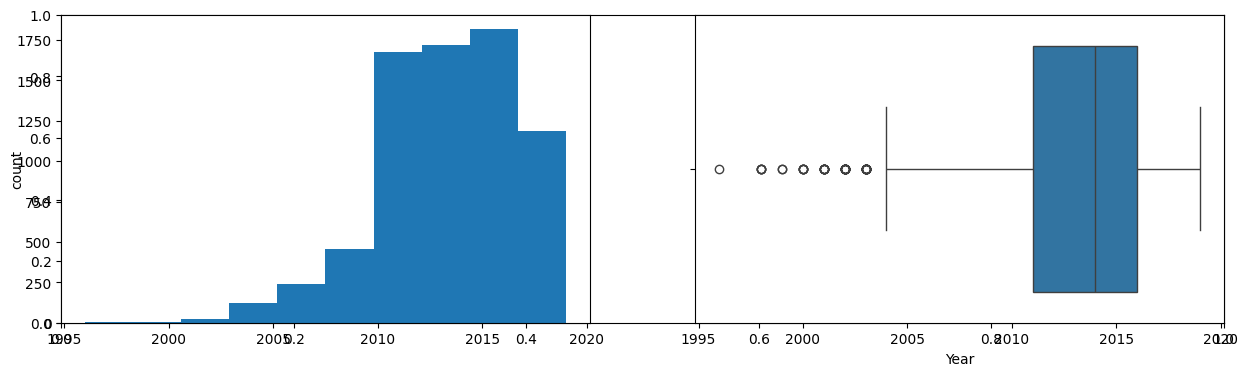

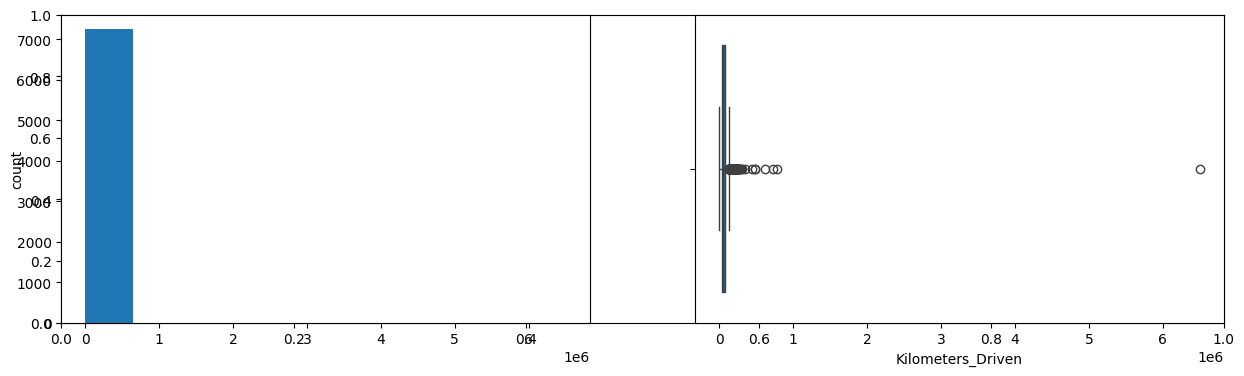

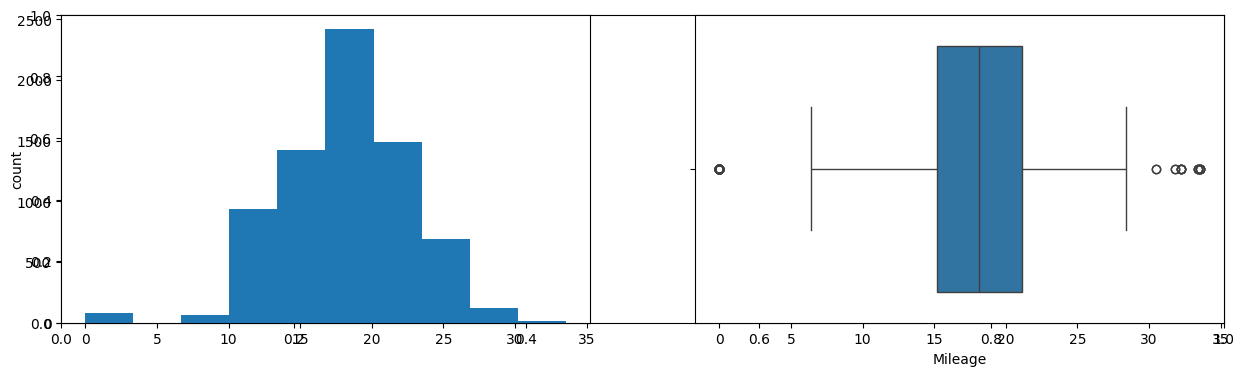

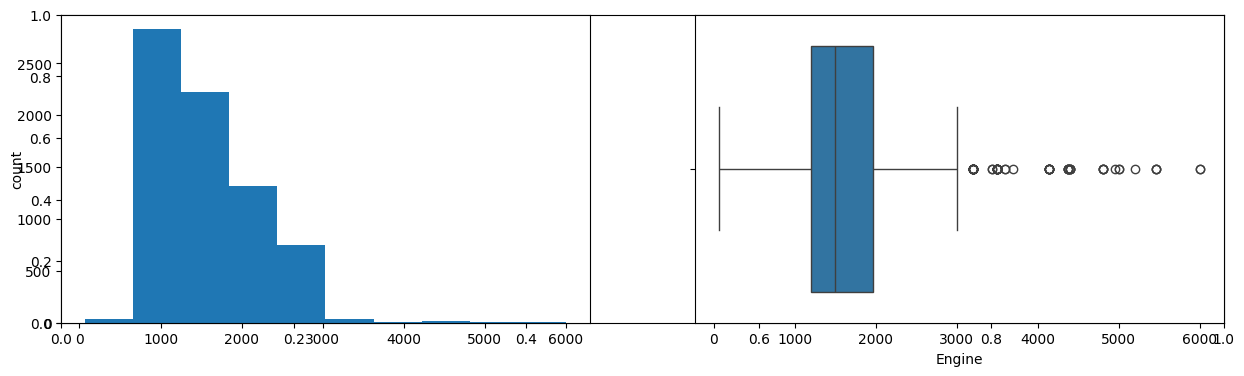

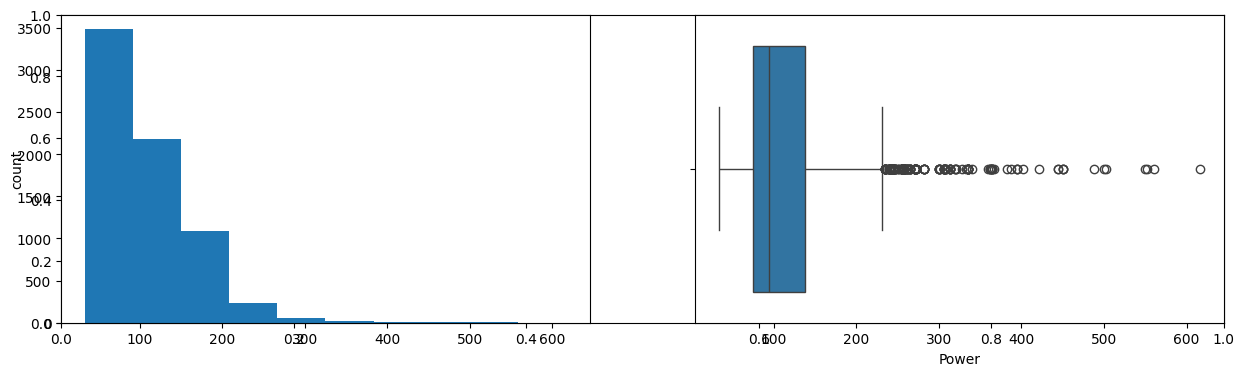

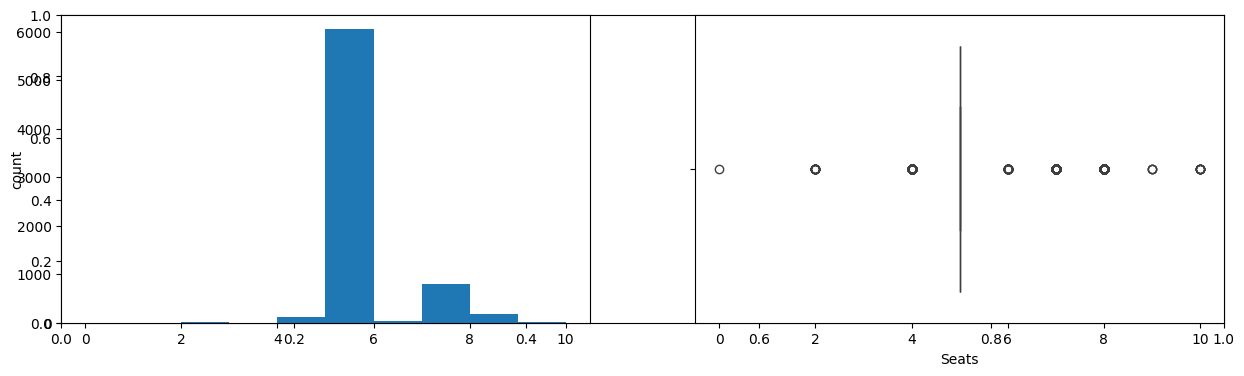

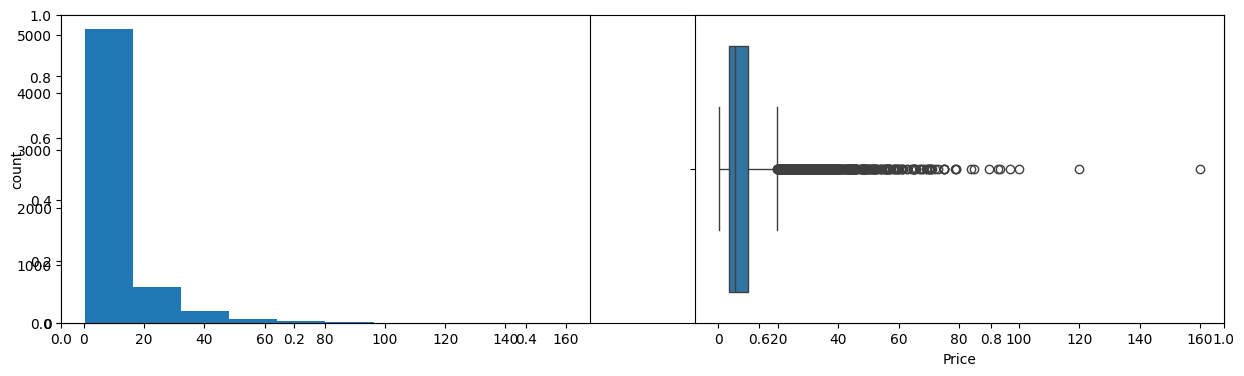

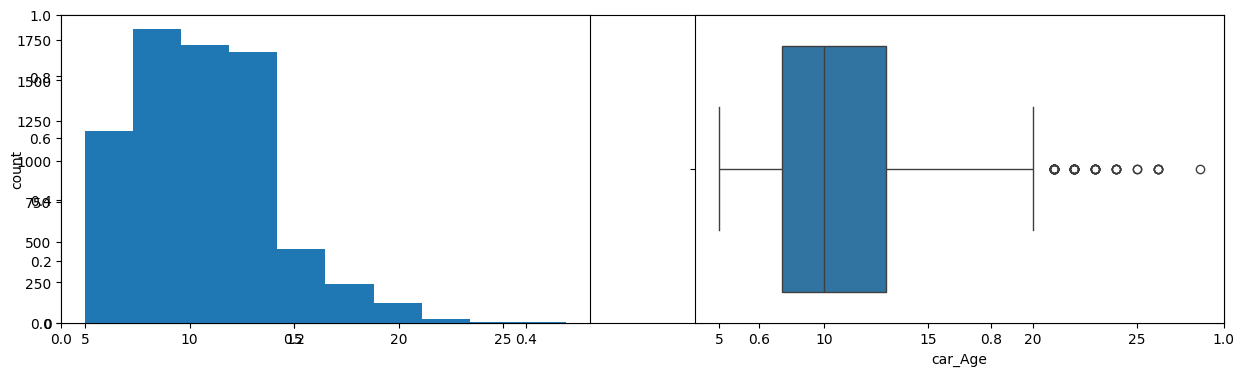

In [107]:
for col in num_data:
    print(col,round(df[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.ylabel('count')
    plt.subplot(1,2,1)
    plt.hist(x=df[col])
    
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
  

#### Price and kilometer are right skwed ,  and all outliers will be handled during imputation

#### Categorical variable analysing , categorical variables influence the factor of car price prediction.

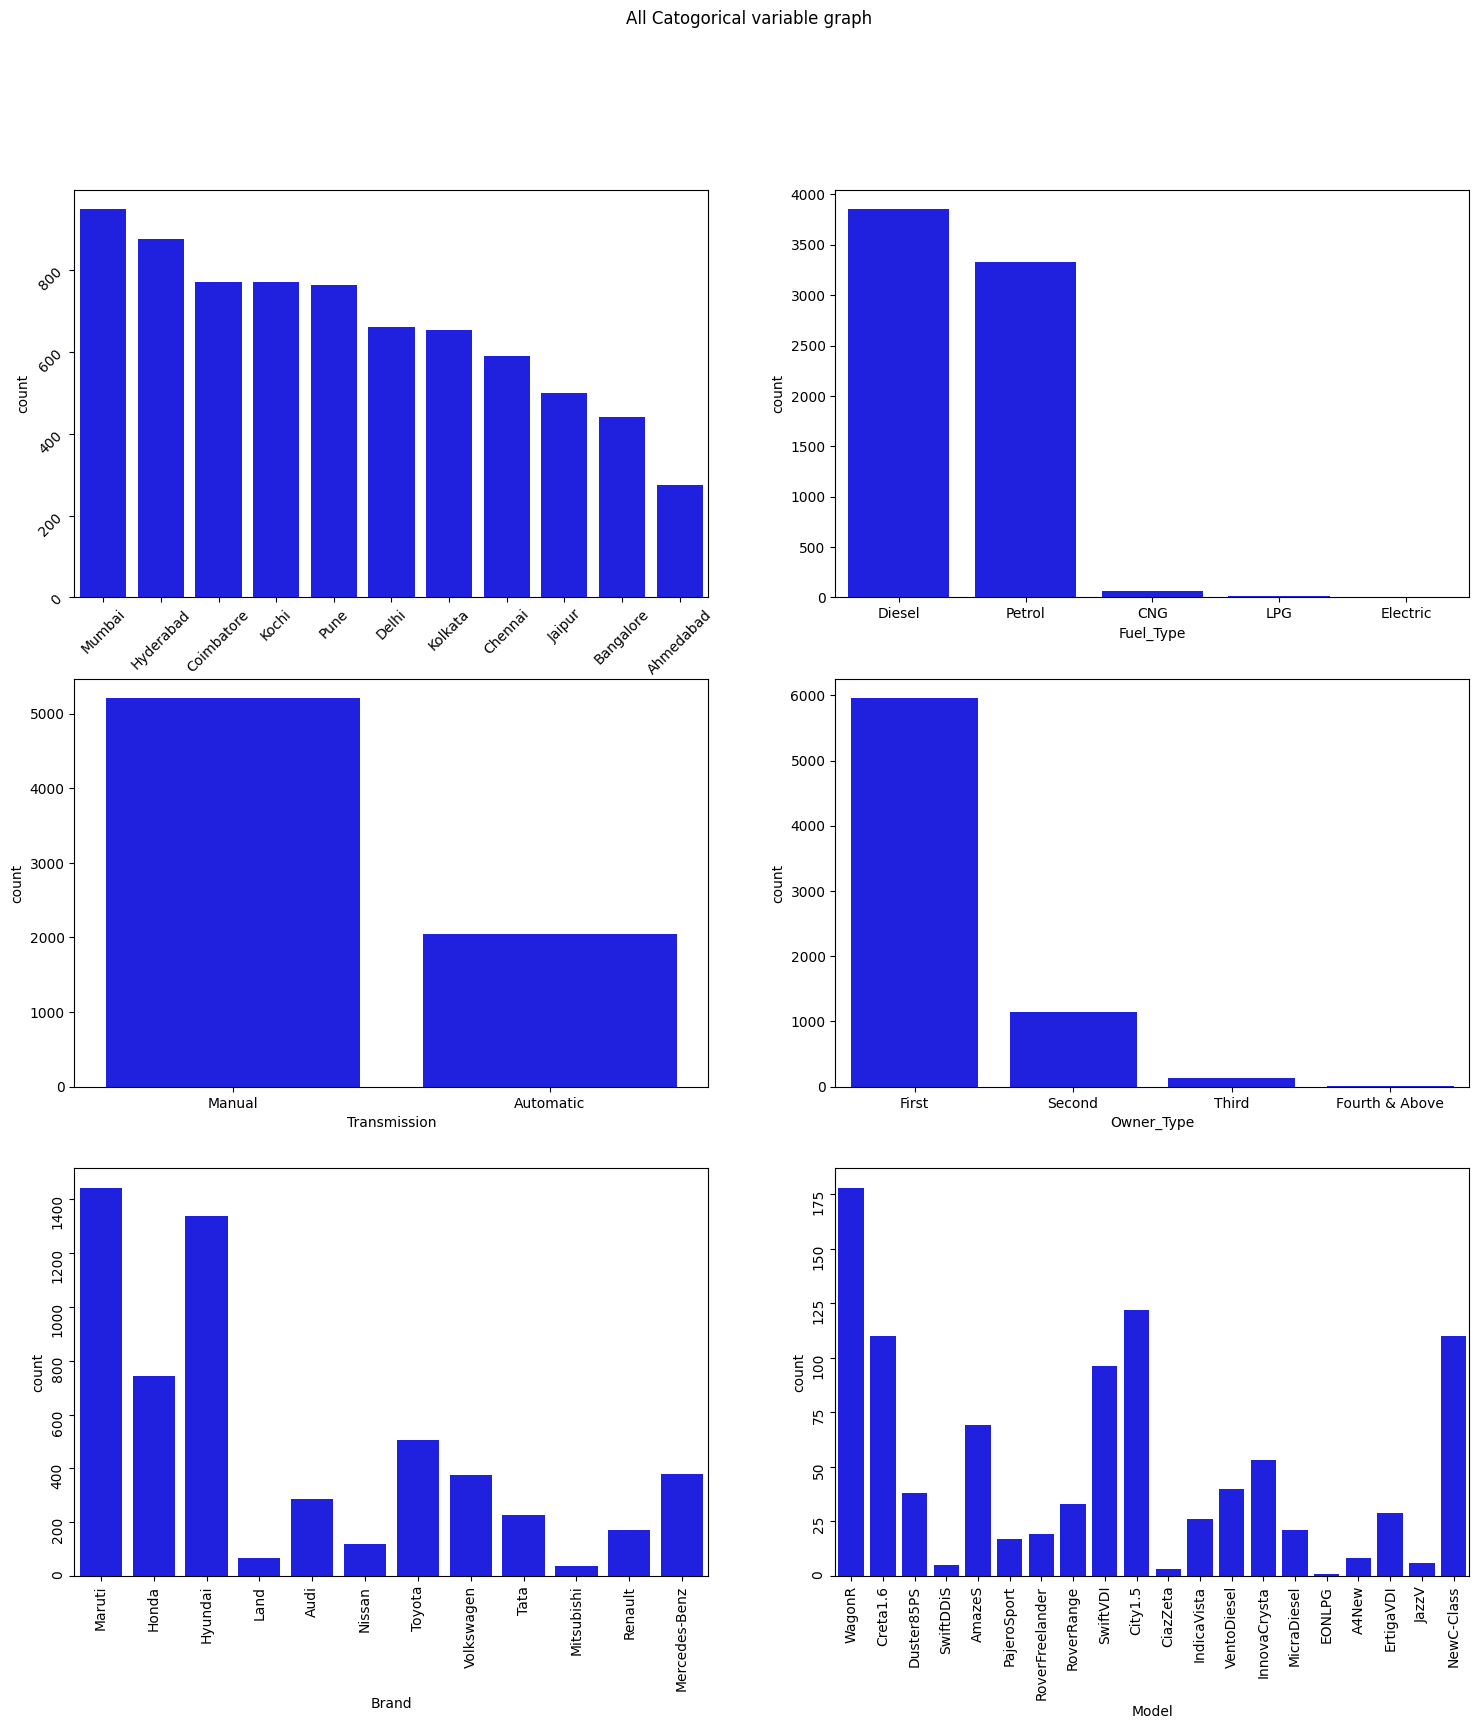

In [108]:
fig,axes=plt.subplots(3,2,figsize=(18,18));
plt.suptitle('All Catogorical variable graph')
sns.countplot(ax=axes[0,0],x='Location',data=df,color='blue',order=df['Location'].value_counts().index);
axes[0, 0].set_xlabel('Location')
sns.countplot(ax=axes[0,1],x='Fuel_Type',data=df,color='blue',order=df['Fuel_Type'].value_counts().index);
sns.countplot(ax=axes[1,0],x='Transmission',data=df,color='blue',order=df['Transmission'].value_counts().index);
sns.countplot(ax=axes[1,1],x='Owner_Type',data=df,color='blue',order=df['Owner_Type'].value_counts().index);
sns.countplot(ax=axes[2,0],x='Brand',data=df,color='blue',order=df['Brand'].head(20).value_counts().index);

sns.countplot(ax=axes[2,1],x='Model',data=df,color='blue',order=df['Model'].head(20).value_counts().index);
axes[0][0].tick_params(labelrotation=45);
axes[2][0].tick_params(labelrotation=90);
axes[2][1].tick_params(labelrotation=90);

### observation
* most number of car is in mumbai , and followed by Hydarbad, coimbathoor. and least in Ahmadabad
* ~ 52% car is using Deisel , for Diesel is very good perfomance
* ~ 72% car is manual
* ~83% car is first owner
* most of model of car is Maruti,Hyundai
* most number of the model is Wagonr.

### Data Transformation
#### before  we doing bivarate analasys, we have to transform some variables ,Here price and Kilomaters are to be transform becuase we can not compare it with other variables

In [109]:
def transform(df,col):
    for column in col:
        if (df[column]==1.0).all():
            df[column+'_log']=np.log(df[column]+1)
        else:
            df[column+'_log']=np.log(df[column])


transform(df,['Kilometers_Driven','Price'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_9080\2818885476.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['Kilometers_Driven_log'])


<Axes: ylabel='Density'>

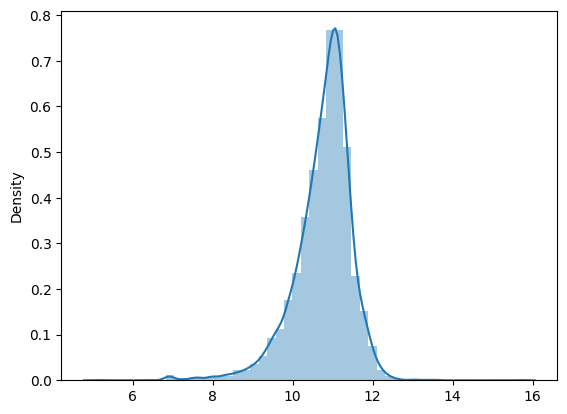

In [110]:
sns.distplot(x=df['Kilometers_Driven_log'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_9080\615513373.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['Price_log'])


<Axes: ylabel='Density'>

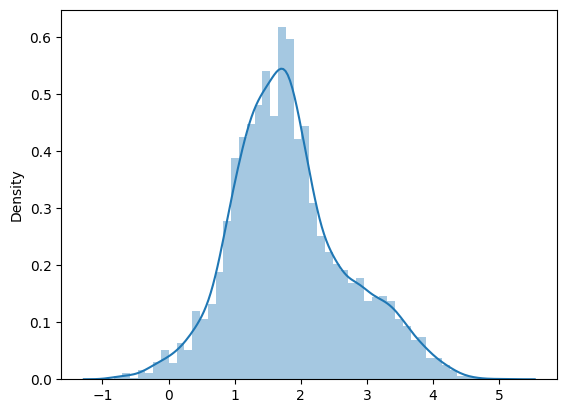

In [111]:
sns.distplot(x=df['Price_log'])

<Figure size 1300x1700 with 0 Axes>

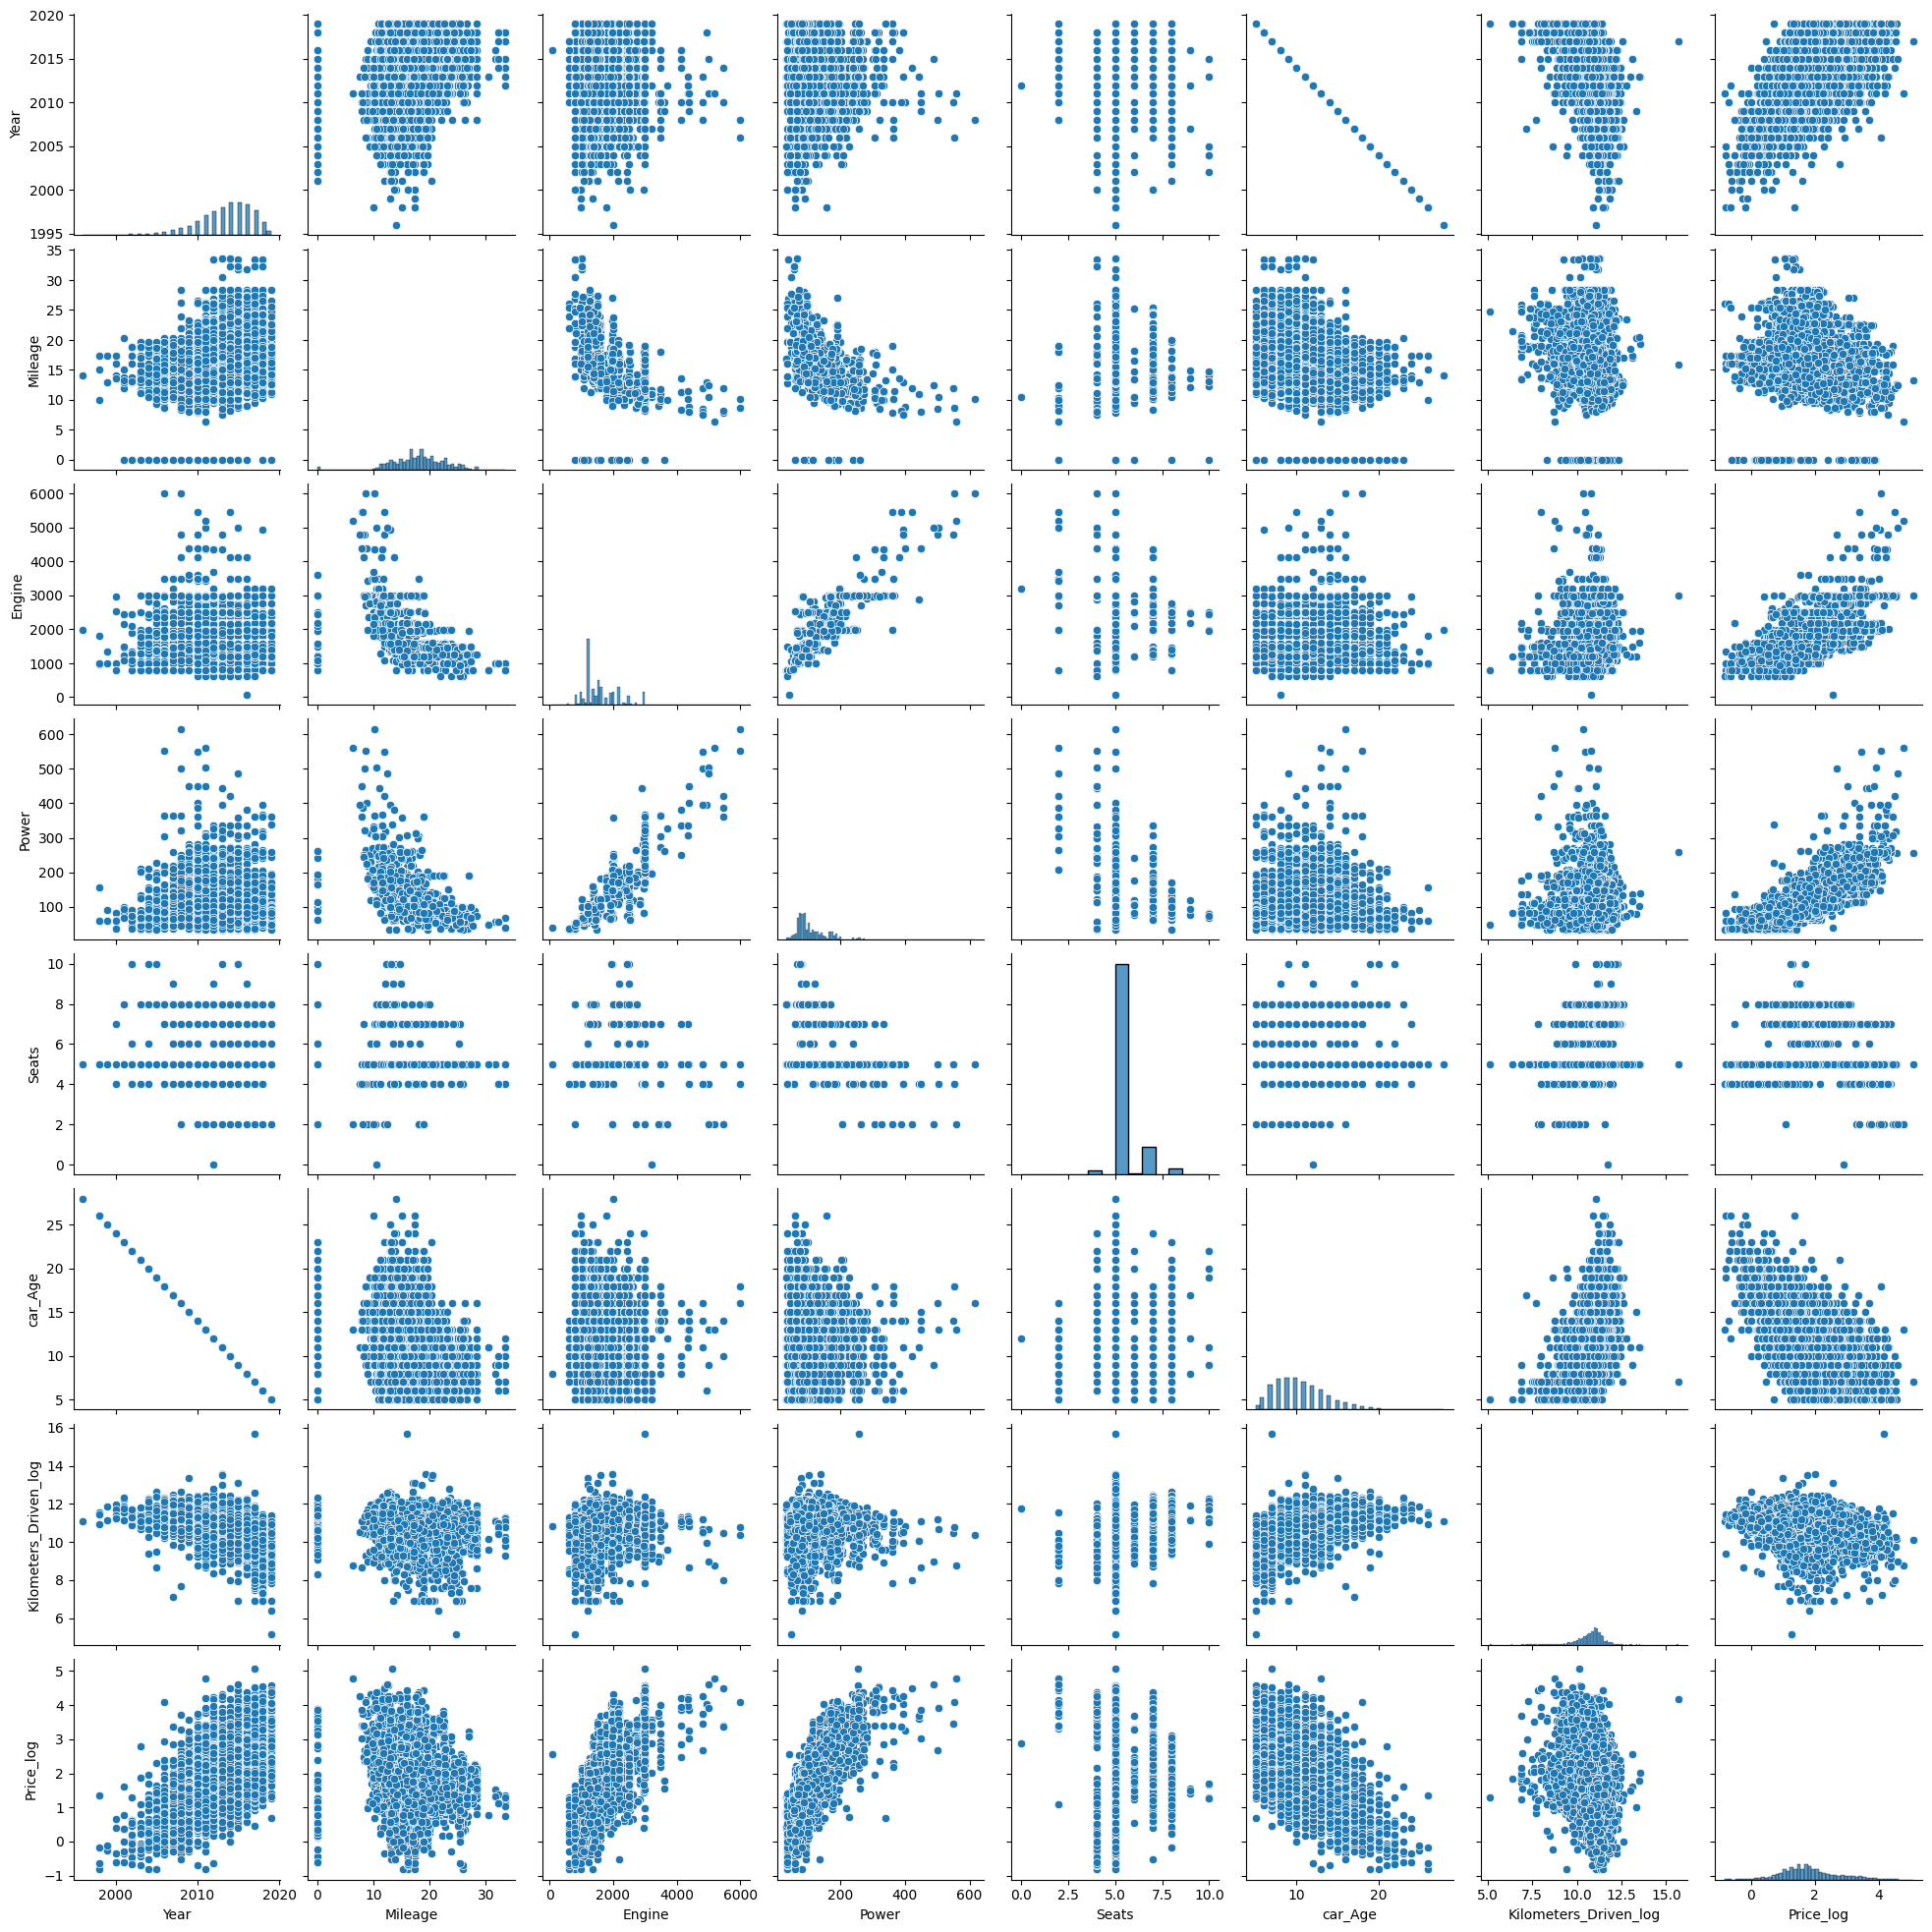

In [112]:
plt.figure(figsize=(13,17))
sns.pairplot(data=df.drop(['Kilometers_Driven','Price'],axis=1))
plt.show()